In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from minisom import MiniSom

In [ ]:
data = pd.read_csv('Credit_Card_Applications.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
X = data.iloc[:, 1:15].values
y = data.iloc[:, -1].values

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 

X = sc.fit_transform(X) 

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00,0.00000
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00,0.00044
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05,0.00000
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06,0.00011


In [ ]:
# Set the hyperparameters 
som_gris_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

In [ ]:
# Define SOM 
som = MiniSom(x=som_grid_columns, y=som_grid_columns, input_len=14, sigma=sigma, learning_rate=learning_rate) 

# Initializing Weights 
som.random_weights_init(X)

In [ ]:
# Training 
som.train_random(X, iterations) 

In [ ]:
# Returns the distance map from the weights 
som.distance_map()

array([[0.21000616, 0.40588356, 0.39518194, 0.33808609, 0.41742518,
        0.42228154, 0.33481159, 0.31148909, 0.49276762, 0.27063044],
       [0.54889077, 0.64100825, 0.58971303, 0.58770643, 0.83697583,
        0.71964927, 0.54551628, 0.6954792 , 0.64578872, 0.53451935],
       [0.40165463, 0.77363374, 0.50824456, 0.73739761, 0.70588833,
        0.75975655, 0.53637437, 0.65650072, 0.70688929, 0.41408997],
       [0.43698822, 0.68788695, 0.68875945, 0.59509261, 0.75958238,
        0.63391009, 0.58417016, 0.65402105, 0.65009351, 0.27773702],
       [0.35670578, 0.62236354, 0.79012249, 0.68742759, 0.79382713,
        0.69712753, 0.84542993, 0.5805236 , 0.48977334, 0.3784876 ],
       [0.31960257, 0.53959249, 0.6742902 , 0.71013388, 0.73104227,
        0.83892563, 0.66664451, 0.51547034, 0.5652805 , 0.29469201],
       [0.36651041, 0.71669867, 0.71374864, 0.76249937, 0.8573909 ,
        0.77237311, 0.66636183, 0.93495447, 0.58944935, 0.44387614],
       [0.40269486, 0.68594354, 0.6056169

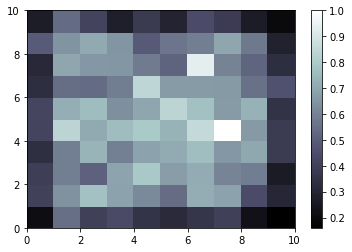

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T) 
colorbar() 
show() 

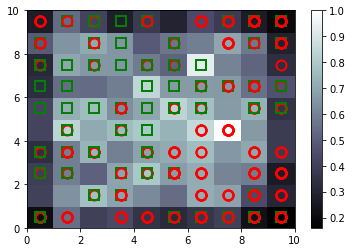

In [ ]:
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ['o', 's'] 
colors = ['r', 'g'] 
for i, x in enumerate(X): 
  w = som.winner(x) 
  plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2) 
show()

In [ ]:
mappings = som.win_map(X) 
mappings

defaultdict(list,
            {(8,
              9): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      , 0.01212   ]), array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
                     0.375     , 0.08473684, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.16      , 0.        ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     , 0.        ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    , 0.        ]), array([1.00000000e+00, 3.07067669e-01, 1.87500000e-01, 5.00000000e-01,

In [ ]:
mappings.keys()

dict_keys([(8, 9), (6, 0), (6, 2), (3, 5), (3, 9), (1, 6), (8, 1), (1, 5), (8, 3), (3, 4), (4, 7), (5, 5), (5, 8), (0, 6), (9, 2), (0, 7), (4, 3), (2, 3), (8, 5), (6, 9), (1, 0), (8, 6), (5, 7), (4, 5), (1, 2), (9, 9), (0, 2), (0, 0), (4, 0), (8, 0), (5, 0), (0, 5), (6, 1), (7, 6), (7, 4), (3, 2), (3, 7), (5, 2), (9, 5), (9, 6), (0, 8), (6, 5), (3, 8), (9, 0), (7, 8), (4, 9), (0, 9), (7, 9), (7, 0), (8, 2), (2, 9), (4, 2), (4, 4), (2, 5), (3, 0), (3, 1), (9, 7), (4, 6), (2, 8), (5, 3), (1, 3), (2, 1), (1, 4), (6, 3), (5, 6), (0, 3), (1, 9), (1, 7), (7, 1), (6, 4), (6, 7), (9, 8), (2, 7), (6, 6), (9, 3), (9, 1), (8, 8)])

In [ ]:
len(mappings.keys())

77

In [ ]:
frauds = np.concatenate((mappings[(4,6)], mappings[(6,7)]), axis=0)
frauds

array([[1.        , 0.75684211, 0.71428571, 0.5       , 1.        ,
        0.875     , 0.61403509, 1.        , 1.        , 0.13432836,
        1.        , 0.5       , 0.        , 0.01      ],
       [1.        , 0.94736842, 0.79607143, 0.5       , 0.69230769,
        1.        , 0.44736842, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.        , 0.00109   ],
       [1.        , 0.46992481, 0.30357143, 0.5       , 0.92307692,
        0.875     , 0.49122807, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.044     , 0.02      ],
       [1.        , 0.77699248, 0.39285714, 0.5       , 0.69230769,
        1.        , 0.70175439, 1.        , 1.        , 0.10447761,
        1.        , 0.5       , 0.011     , 0.        ],
       [1.        , 0.81203008, 0.19642857, 0.5       , 0.69230769,
        1.        , 0.45614035, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.        , 0.        ],
       [1.        , 0.69669173, 0.5

In [ ]:
# the list of customers who are frauds: 

frauds1 = sc.inverse_transform(frauds) 

pd.DataFrame(frauds1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,64.08,20.000,2.0,14.0,8.0,17.500,1.0,1.0,9.0,1.0,2.0,0.0,1001.0
1,1.0,76.75,22.290,2.0,10.0,9.0,12.750,1.0,1.0,1.0,1.0,2.0,0.0,110.0
2,1.0,45.00,8.500,2.0,13.0,8.0,14.000,1.0,1.0,1.0,1.0,2.0,88.0,2001.0
3,1.0,65.42,11.000,2.0,10.0,9.0,20.000,1.0,1.0,7.0,1.0,2.0,22.0,1.0
4,1.0,67.75,5.500,2.0,10.0,9.0,13.000,1.0,1.0,1.0,1.0,2.0,0.0,1.0
5,1.0,60.08,14.500,2.0,1.0,1.0,18.000,1.0,1.0,15.0,1.0,2.0,0.0,1001.0
6,1.0,54.58,9.415,2.0,1.0,1.0,14.415,1.0,1.0,11.0,1.0,2.0,30.0,301.0
7,1.0,56.58,18.500,2.0,2.0,5.0,15.000,1.0,1.0,17.0,1.0,2.0,0.0,1.0
